In [19]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df_p = pd.read_csv(r'C:\Users\Nikkitha\Downloads\google_stock.csv')
df=pd.read_csv(r'C:\Users\Nikkitha\Downloads\google.csv')
df_p.head()
print(df.tail)

<bound method NDFrame.tail of              ds            y
0    16/07/2018  1183.859985
1    17/07/2018  1198.800049
2    18/07/2018  1195.880005
3    19/07/2018  1186.959961
4    20/07/2018  1184.910034
5    23/07/2018  1205.500000
6    24/07/2018  1248.079956
7    25/07/2018  1263.699951
8    26/07/2018  1268.329956
9    27/07/2018  1238.500000
10   30/07/2018  1219.739990
11   31/07/2018  1217.260010
12   01/08/2018  1220.010010
13   02/08/2018  1226.150024
14   03/08/2018  1223.709961
15   06/08/2018  1224.770020
16   07/08/2018  1242.219971
17   08/08/2018  1245.609985
18   09/08/2018  1249.099976
19   10/08/2018  1237.609985
20   13/08/2018  1235.010010
21   14/08/2018  1242.099976
22   15/08/2018  1214.380005
23   16/08/2018  1206.489990
24   17/08/2018  1200.959961
25   20/08/2018  1207.770020
26   21/08/2018  1201.619995
27   22/08/2018  1207.329956
28   23/08/2018  1205.380005
29   24/08/2018  1220.650024
..          ...          ...
221  03/06/2019  1036.229980
222  04/06/20

In [26]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null object
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [27]:
df_p.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

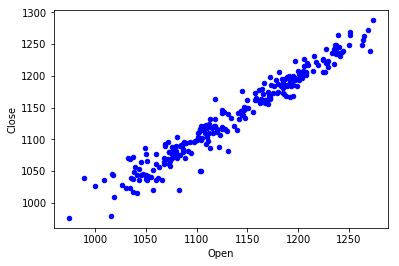

In [28]:
df_p.plot.scatter(x='Open', y='Close', c='blue')

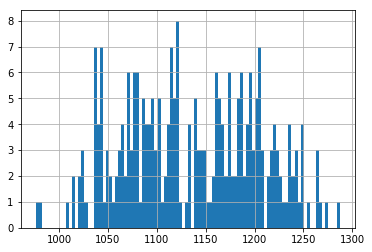

In [29]:
df_p['Close'].hist(bins=100)

In [32]:
m=Prophet(yearly_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future=m.make_future_dataframe(periods=10)
future.tail()

,ds
256,2019-12-13
257,2019-12-14
258,2019-12-15
259,2019-12-16
260,2019-12-17


In [49]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
256,2019-12-13,1080.685346,1140.919048,1021.062643
257,2019-12-14,1078.356904,1140.522958,1017.526608
258,2019-12-15,1074.125054,1137.006108,1012.982074
259,2019-12-16,1075.609677,1138.569662,1014.215799
260,2019-12-17,1073.219755,1137.903870,1013.805736


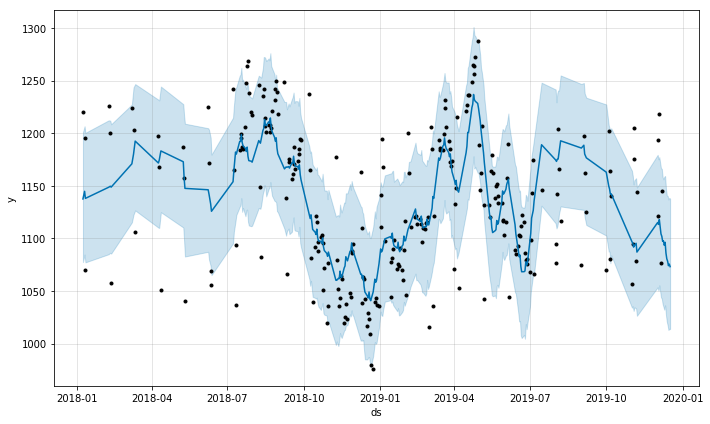

In [50]:
fig1=m.plot(forecast)

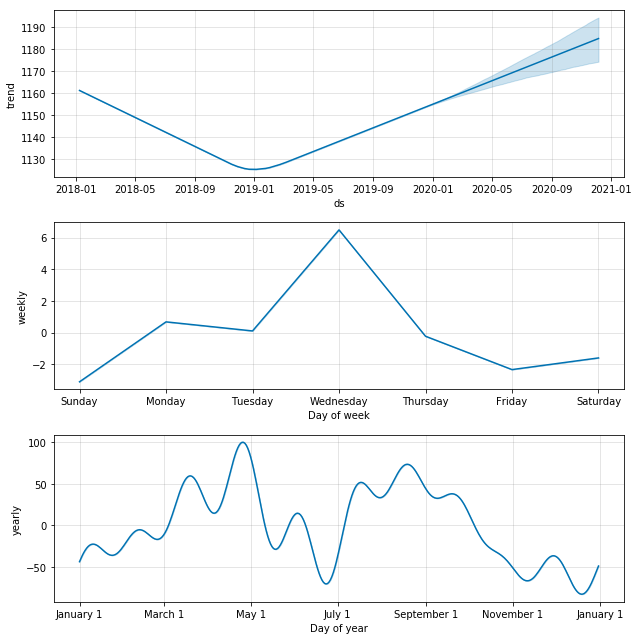

In [44]:
fig2=m.plot_components(forecast)